# **DMML Assignment 1**

# **Task 2: Supermarket Sales**

submission by 

Utpalraj Kemprai(MDS202352) 

Aryan Joshi 

In [3]:
# importing libraries for use
# python version 3.8.5
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score,confusion_matrix,precision_score,recall_score,classification_report

### **Storing and reading first few rows of the SuperMarket Data**

In [4]:
data = pd.read_csv("supermarket-sales-data.csv")
data.head()

,InvoiceID,Branch,CustomerType,Gender,ProductType,UnitPrice,Quantity,Tax,Total,PaymentType,Rating
0,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,UPI,9.1
1,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,9.6
2,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,7.4
3,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,UPI,8.4
4,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,UPI,5.3


In [5]:
data.drop_duplicates()

,InvoiceID,Branch,CustomerType,Gender,ProductType,UnitPrice,Quantity,Tax,Total,PaymentType,Rating
0,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,UPI,9.1
1,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,9.6
2,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,7.4
3,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,UPI,8.4
4,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,UPI,5.3
...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,UPI,6.2
996,303-96-2227,B,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,UPI,4.4
997,727-02-1313,A,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,Cash,7.7
998,347-56-2442,A,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,Cash,4.1


In [6]:
data.dtypes

InvoiceID        object
Branch           object
CustomerType     object
Gender           object
ProductType      object
UnitPrice       float64
Quantity          int64
Tax             float64
Total           float64
PaymentType      object
Rating          float64
dtype: object

In [7]:
data.shape

(1000, 11)

### Checking for missing values

In [8]:
data.isna().sum()

InvoiceID       0
Branch          0
CustomerType    0
Gender          0
ProductType     0
UnitPrice       0
Quantity        0
Tax             0
Total           0
PaymentType     0
Rating          0
dtype: int64

### Correlation Heat Map for Numerical Data

<AxesSubplot:>

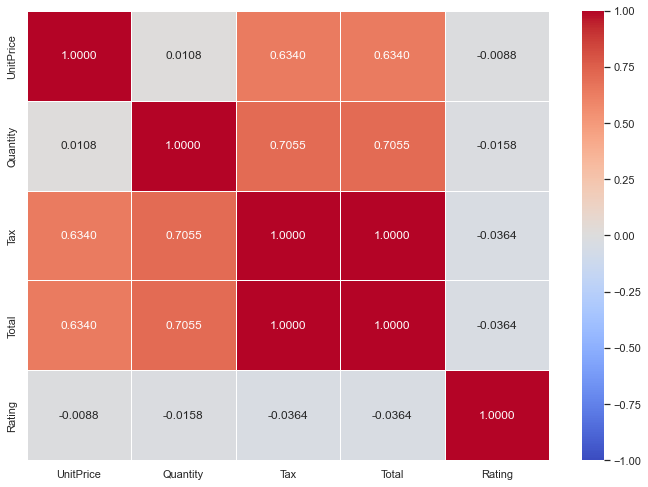

In [9]:
num_data = data.iloc[:,1:].select_dtypes(include = ["float64","int64"]) # InvoiceID is dropped as it is redundant for prediction
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(num_data.corr(),annot=True,cmap="coolwarm",linewidths=0.5,vmin=-1,vmax=1,fmt=".4f")

##### We see from the above heatmap that Tax and Total are perfectly correlated (correlation coefficient = 1). So in building a classfier we can drop one of Tax or Total with no loss of information.

### Checking for outliers

<AxesSubplot:>

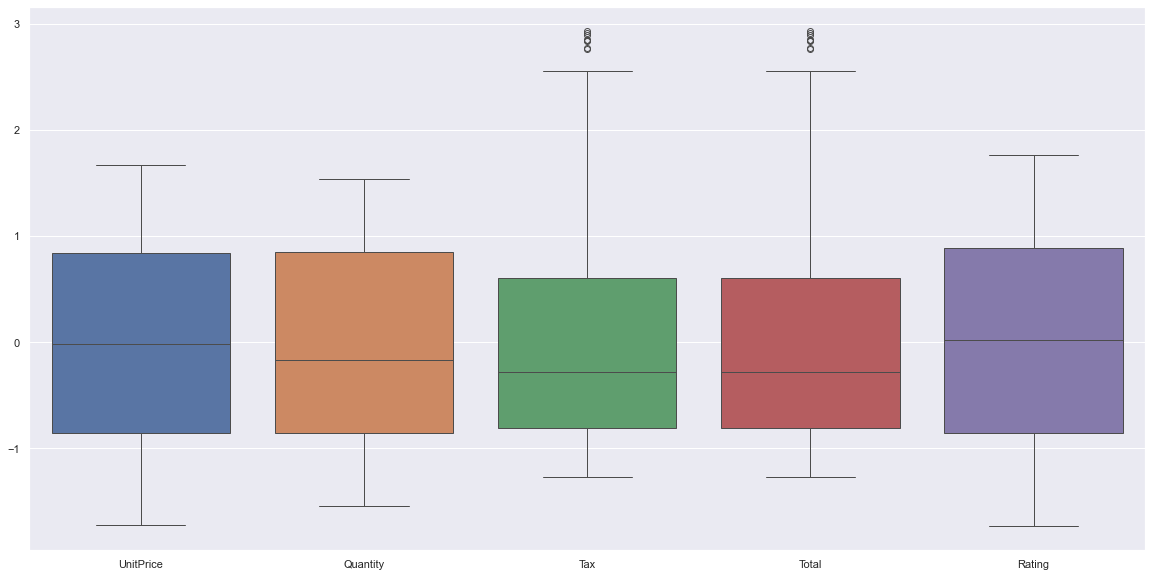

In [10]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
scaler = StandardScaler()
num_col = [col for col in data.select_dtypes(include=['int64','float64']).columns] 
scaler.set_output(transform='pandas')
scaler.fit(data[num_col])
# sns.boxplot(pd.DataFrame(box.fit_transform(data.iloc[:,1:].select_dtypes(include = ["int64","float64"]))))
sns.boxplot(scaler.transform(data[num_col]))

We see that Tax and Total have a few outliers from the above Boxplots. Also as these two are perfectly correlated, all outliers in both these features correspond to the same row in the dataframe

In [11]:
scaler.transform(data[num_col]).describe()

,UnitPrice,Quantity,Tax,Total,Rating
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-1.065814e-16,6.394885e-17,1.243450e-16,3.197442e-17,1.882938e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.721668e+00,-1.543480e+00,-1.270692e+00,-1.270692e+00,-1.730607e+00
25%,-8.608740e-01,-8.590099e-01,-8.078714e-01,-8.078714e-01,-8.573570e-01
50%,-1.669588e-02,-1.745399e-01,-2.812422e-01,-2.812422e-01,1.589315e-02
75%,8.406991e-01,8.521652e-01,6.037682e-01,6.037682e-01,8.891433e-01
max,1.672416e+00,1.536635e+00,2.928371e+00,2.928371e+00,1.762394e+00


### Encoding the non-numeric columns in the data

In [12]:
obj_columns = data.iloc[:,1:].select_dtypes(include=['object']).columns
obj_columns = list(obj_columns) # columns of data with type object
obj_columns = [obj for obj in obj_columns if obj != 'Gender']

In [13]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
enc = OneHotEncoder(sparse_output=False)
encoded_data = enc.fit_transform(data[obj_columns])
encoded_df = pd.DataFrame(
    encoded_data,columns= enc.get_feature_names_out(obj_columns)
)

data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

In [14]:
encoded_df.dtypes

Branch_A                              float64
Branch_B                              float64
Branch_C                              float64
CustomerType_Member                   float64
CustomerType_Normal                   float64
ProductType_Electronic accessories    float64
ProductType_Fashion accessories       float64
ProductType_Food and beverages        float64
ProductType_Health and beauty         float64
ProductType_Home and lifestyle        float64
ProductType_Sports and travel         float64
PaymentType_Cash                      float64
PaymentType_Credit card               float64
PaymentType_UPI                       float64
dtype: object

In [15]:
for col in encoded_df:
    data[col]=encoded_df[col]

In [16]:
data.shape

(1000, 25)

In [17]:
data.head()

,InvoiceID,Branch,CustomerType,Gender,ProductType,UnitPrice,Quantity,Tax,Total,PaymentType,...,CustomerType_Normal,ProductType_Electronic accessories,ProductType_Fashion accessories,ProductType_Food and beverages,ProductType_Health and beauty,ProductType_Home and lifestyle,ProductType_Sports and travel,PaymentType_Cash,PaymentType_Credit card,PaymentType_UPI
0,750-67-8428,A,Member,0,Health and beauty,74.69,7,26.1415,548.9715,UPI,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,226-31-3081,C,Normal,0,Electronic accessories,15.28,5,3.8200,80.2200,Cash,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,631-41-3108,A,Normal,1,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,123-19-1176,A,Member,1,Health and beauty,58.22,8,23.2880,489.0480,UPI,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,373-73-7910,A,Normal,1,Sports and travel,86.31,7,30.2085,634.3785,UPI,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [18]:
data = data.drop(obj_columns,axis=1)


In [19]:
data.head()

,InvoiceID,Gender,UnitPrice,Quantity,Tax,Total,Rating,Branch_A,Branch_B,Branch_C,...,CustomerType_Normal,ProductType_Electronic accessories,ProductType_Fashion accessories,ProductType_Food and beverages,ProductType_Health and beauty,ProductType_Home and lifestyle,ProductType_Sports and travel,PaymentType_Cash,PaymentType_Credit card,PaymentType_UPI
0,750-67-8428,0,74.69,7,26.1415,548.9715,9.1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,226-31-3081,0,15.28,5,3.8200,80.2200,9.6,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,631-41-3108,1,46.33,7,16.2155,340.5255,7.4,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,123-19-1176,1,58.22,8,23.2880,489.0480,8.4,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,373-73-7910,1,86.31,7,30.2085,634.3785,5.3,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [20]:
data.dtypes

InvoiceID                              object
Gender                                  int32
UnitPrice                             float64
Quantity                                int64
Tax                                   float64
Total                                 float64
Rating                                float64
Branch_A                              float64
Branch_B                              float64
Branch_C                              float64
CustomerType_Member                   float64
CustomerType_Normal                   float64
ProductType_Electronic accessories    float64
ProductType_Fashion accessories       float64
ProductType_Food and beverages        float64
ProductType_Health and beauty         float64
ProductType_Home and lifestyle        float64
ProductType_Sports and travel         float64
PaymentType_Cash                      float64
PaymentType_Credit card               float64
PaymentType_UPI                       float64
dtype: object

Dropping outliers

In [21]:
iqr = 1.5*(np.percentile(data['Total'],75) - np.percentile(data['Total'],25)) #interquartile range
sum(data['Total'] > iqr + np.percentile(data['Total'],75)) 

9

In [22]:
data = data[data['Total'] <= iqr + np.percentile(data['Total'],75)]

#### In the data, gender columns male has been encoded as 1 and female as 0

In [23]:
data.describe()

,Gender,UnitPrice,Quantity,Tax,Total,Rating,Branch_A,Branch_B,Branch_C,CustomerType_Member,CustomerType_Normal,ProductType_Electronic accessories,ProductType_Fashion accessories,ProductType_Food and beverages,ProductType_Health and beauty,ProductType_Home and lifestyle,ProductType_Sports and travel,PaymentType_Cash,PaymentType_Credit card,PaymentType_UPI
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,0.500505,55.292482,5.469223,15.076417,316.604752,6.979717,0.342079,0.332997,0.324924,0.502523,0.497477,0.171544,0.176589,0.174571,0.153380,0.157417,0.166498,0.345106,0.309788,0.345106
std,0.500252,26.311619,2.905031,11.319504,237.709589,1.716957,0.474645,0.471523,0.468583,0.500246,0.500246,0.377174,0.381513,0.379792,0.360536,0.364377,0.372716,0.475643,0.462640,0.475643
min,0.000000,10.080000,1.000000,0.508500,10.678500,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,32.665000,3.000000,5.817500,122.167500,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,54.840000,5.000000,12.036000,252.756000,7.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,77.485000,8.000000,22.127000,464.667000,8.500000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,99.960000,10.000000,45.325000,951.825000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Percentage of Male in given data

In [24]:
sum(data['Gender']==1)*100/len(data['Gender'])

50.05045408678103

In [25]:
data[data['Gender'] == 1].describe() #male

,Gender,UnitPrice,Quantity,Tax,Total,Rating,Branch_A,Branch_B,Branch_C,CustomerType_Member,CustomerType_Normal,ProductType_Electronic accessories,ProductType_Fashion accessories,ProductType_Food and beverages,ProductType_Health and beauty,ProductType_Home and lifestyle,ProductType_Sports and travel,PaymentType_Cash,PaymentType_Credit card,PaymentType_UPI
count,496.0,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,1.0,55.832319,5.264113,14.594585,306.486278,6.979839,0.358871,0.342742,0.298387,0.483871,0.516129,0.173387,0.163306,0.169355,0.177419,0.159274,0.157258,0.332661,0.296371,0.370968
std,0.0,25.670467,2.933058,11.252843,236.309705,1.681989,0.480154,0.475105,0.458012,0.500244,0.500244,0.378964,0.370018,0.375444,0.382409,0.366301,0.364411,0.471642,0.457118,0.483552
min,1.0,10.080000,1.000000,0.508500,10.678500,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,33.767500,3.000000,5.600000,117.600000,5.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,56.075000,5.000000,11.349000,238.329000,6.900000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,76.400000,8.000000,21.614375,453.901875,8.425000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.0,99.960000,10.000000,45.250000,950.250000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
data[data['Gender'] == 0].describe() #female

,Gender,UnitPrice,Quantity,Tax,Total,Rating,Branch_A,Branch_B,Branch_C,CustomerType_Member,CustomerType_Normal,ProductType_Electronic accessories,ProductType_Fashion accessories,ProductType_Food and beverages,ProductType_Health and beauty,ProductType_Home and lifestyle,ProductType_Sports and travel,PaymentType_Cash,PaymentType_Credit card,PaymentType_UPI
count,495.0,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,0.0,54.751556,5.674747,15.559222,326.743667,6.979596,0.325253,0.323232,0.351515,0.521212,0.478788,0.169697,0.189899,0.179798,0.129293,0.155556,0.175758,0.357576,0.323232,0.319192
std,0.0,26.953902,2.864919,11.376802,238.912840,1.752999,0.468943,0.468184,0.477926,0.500055,0.500055,0.375746,0.392618,0.384408,0.335863,0.362800,0.380999,0.479771,0.468184,0.466635
min,0.0,10.160000,1.000000,0.604500,12.694500,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,30.390000,3.000000,6.257250,131.402250,5.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,52.790000,6.000000,12.854000,269.934000,7.100000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,77.940000,8.000000,22.846250,479.771250,8.500000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,0.0,99.730000,10.000000,45.325000,951.825000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### **Splitting the data into training and testing data for gender prediction**

In [27]:
from sklearn.model_selection import train_test_split
pred_cols = []
for col in data.columns:
    if col not in ['Gender','InvoiceID','Tax']: # Tax dropped as it has perfect correlation with Total
        pred_cols.append(col)
Xg = data[pred_cols] # features to predict from
yg = data['Gender'] # label to predict
Xg_train, Xg_test, yg_train, yg_test = train_test_split(Xg,yg,test_size=0.20,random_state=42) # splits 20% for test and 80% for training

In [28]:
pred_cols

['UnitPrice',
 'Quantity',
 'Total',
 'Rating',
 'Branch_A',
 'Branch_B',
 'Branch_C',
 'CustomerType_Member',
 'CustomerType_Normal',
 'ProductType_Electronic accessories',
 'ProductType_Fashion accessories',
 'ProductType_Food and beverages',
 'ProductType_Health and beauty',
 'ProductType_Home and lifestyle',
 'ProductType_Sports and travel',
 'PaymentType_Cash',
 'PaymentType_Credit card',
 'PaymentType_UPI']

## **1. Building a classifier to predict Gender**

### **1.a. Using a Decision Tree Classifier**

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [161]:
parameters_dtc = {}
parameters_dtc['criterion'] = ['gini','entropy']
parameters_dtc['max_depth'] = [2,3,4,5]
parameters_dtc['max_features'] = ['log2','sqrt']
parameters_dtc['ccp_alpha'] = [0,0.005,0.010,0.015,0.020]
parameters_dtc['random_state'] = [42]

#### Hyperparametric Tuning

In [162]:
from sklearn.model_selection import GridSearchCV
dtc_gender = GridSearchCV(dtc,param_grid=parameters_dtc,cv=3,n_jobs=-1,verbose=3,scoring='accuracy')

#### Fitting the data

In [163]:
dtc_gender.fit(Xg_train,yg_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0, 0.005, 0.01, 0.015, 0.02],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ['log2', 'sqrt'],
                         'random_state': [42]},
             scoring='accuracy', verbose=3)

#### Visualizing the Tree

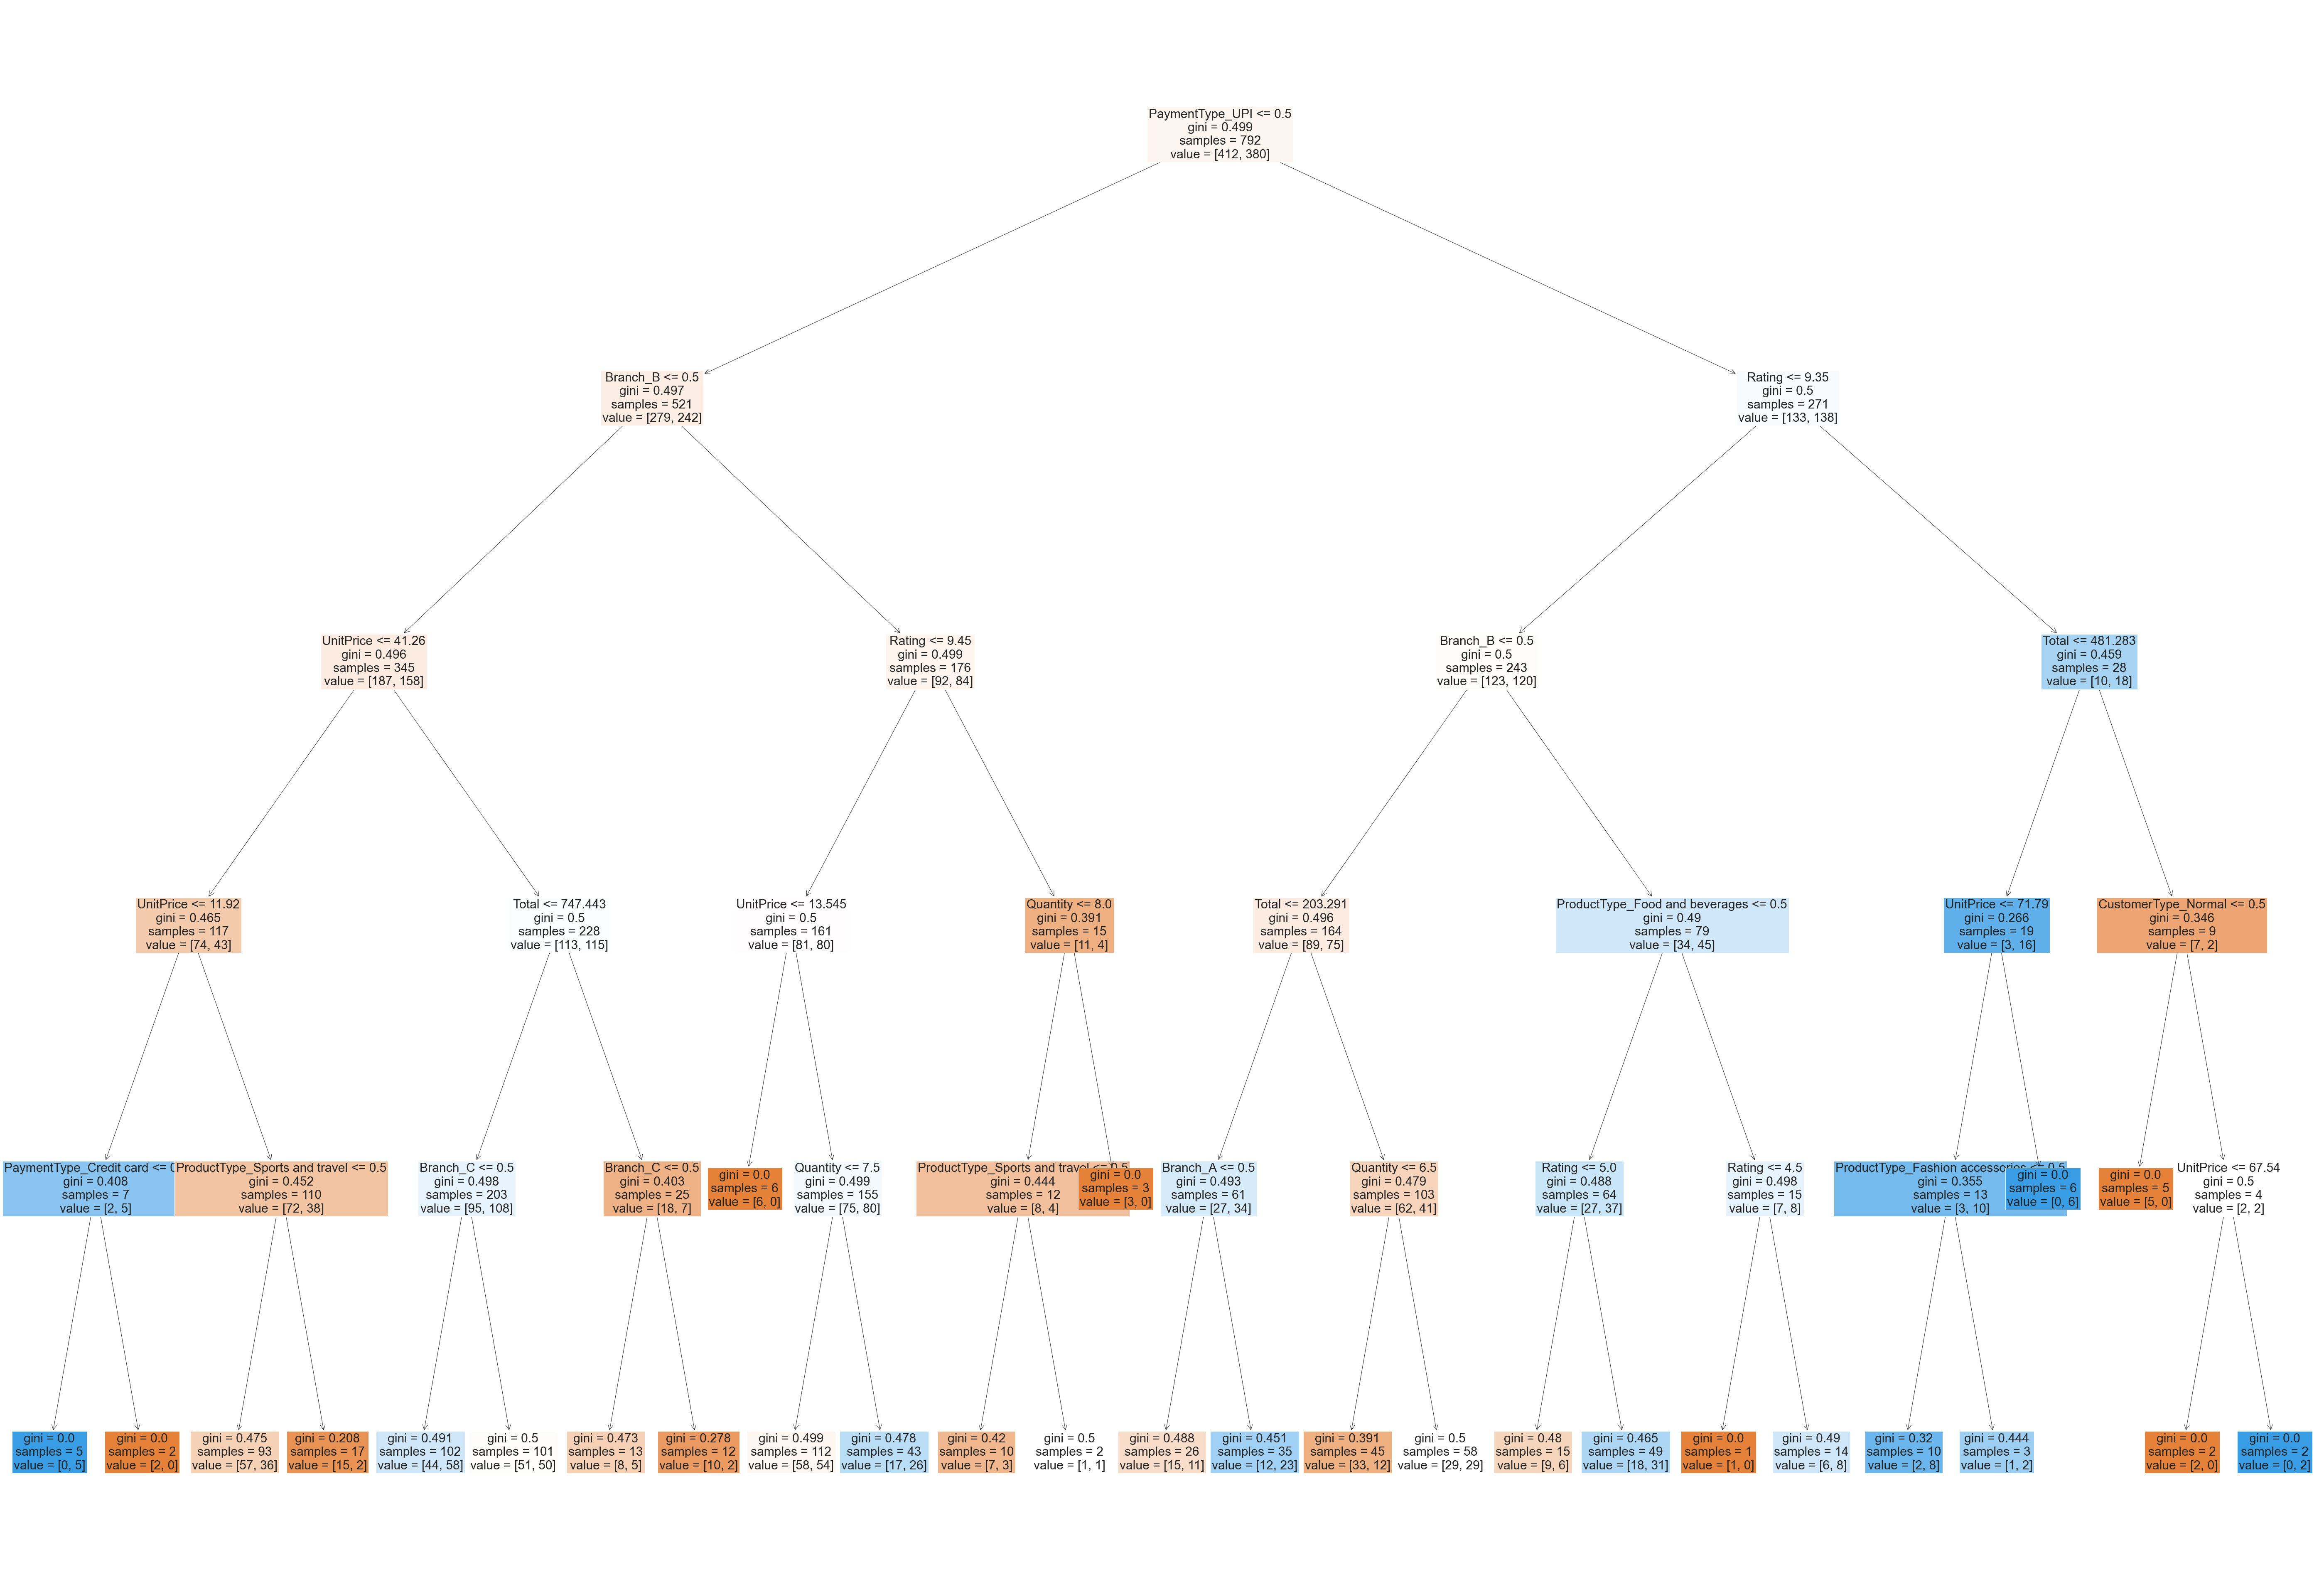

In [164]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(100,70))
_ = plot_tree(dtc_gender.best_estimator_,feature_names=list(Xg.columns),filled=True,fontsize=30)


#### The best parameters found and Accuracy on the training data

In [166]:
dtc_gender.best_params_ # best parameters found by hyperparametric tuning

{'ccp_alpha': 0,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'random_state': 42}

In [167]:
dtc_gender = dtc_gender.best_estimator_
dtc_gender.score(Xg_train,yg_train)

0.6073232323232324

In [168]:
dtc_gender.get_params()

{'ccp_alpha': 0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

Classsification Report for training data

In [169]:
print(classification_report(yg_train,dtc_gender.predict(Xg_train),target_names=['Female','Male'],digits=3))

              precision    recall  f1-score   support

      Female      0.597     0.757     0.667       412
        Male      0.628     0.445     0.521       380

    accuracy                          0.607       792
   macro avg      0.612     0.601     0.594       792
weighted avg      0.612     0.607     0.597       792



confusion matrix for training data

In [170]:
confusion_matrix(y_true=yg_train,y_pred=dtc_gender.predict(Xg_train))

array([[312, 100],
       [211, 169]], dtype=int64)

Feature importance according to Decision Tree

In [171]:
dict(zip(dtc_gender.feature_names_in_,dtc_gender.feature_importances_))

{'UnitPrice': 0.2579079692599452,
 'Quantity': 0.10681239111281864,
 'Total': 0.23929237520479338,
 'Rating': 0.11180349191228568,
 'Branch_A': 0.04132304241799066,
 'Branch_B': 0.03619325822035739,
 'Branch_C': 0.028877139627507768,
 'CustomerType_Member': 0.0,
 'CustomerType_Normal': 0.028088710654395225,
 'ProductType_Electronic accessories': 0.0,
 'ProductType_Fashion accessories': 0.002074243248324603,
 'ProductType_Food and beverages': 0.0012326588449359844,
 'ProductType_Health and beauty': 0.0,
 'ProductType_Home and lifestyle': 0.0,
 'ProductType_Sports and travel': 0.056129936512445126,
 'PaymentType_Cash': 0.0,
 'PaymentType_Credit card': 0.07222811311130203,
 'PaymentType_UPI': 0.018036669872898228}

#### Accuracy on the Test Data

In [172]:
dtc_gender.score(Xg_test,yg_test)

0.5175879396984925

#### Confusion Matrix for test data

In [173]:
confusion_matrix(y_true=yg_test,y_pred=dtc_gender.predict(Xg_test))

array([[56, 27],
       [69, 47]], dtype=int64)

#### Accuracy, F score, Precision and Recall

In [174]:
lab = ['Accuracy','F Score','Precision','Recall']
score = [dtc_gender.score(Xg_test,yg_test),f1_score(yg_test,dtc_gender.predict(Xg_test)),
         precision_score(yg_test,dtc_gender.predict(Xg_test)),recall_score(yg_test,dtc_gender.predict(Xg_test))]
dtctest = pd.DataFrame((zip(lab,score)),columns=["Metric","score"])
dtctest

,Metric,score
0,Accuracy,0.517588
1,F Score,0.494737
2,Precision,0.635135
3,Recall,0.405172


### **1.b. Using a Random Forest Classifier**

In [175]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [196]:
parameters_rfc = {}
parameters_rfc['n_estimators'] = [50,75,100,125,150,175,200,250,300]
parameters_rfc['criterion'] = ['gini']
parameters_rfc['max_features'] = ["log2","sqrt"]
parameters_rfc['max_depth'] = [2,3]
parameters_rfc['ccp_alpha'] = [0,0.005,0.010,0.015,0.020]
parameters_rfc['random_state'] = [0]

#### Fitting the data with Hyperparametric Tuning

In [197]:
rfc_gender = GridSearchCV(rfc,param_grid=parameters_rfc,n_jobs=-1,cv=3,scoring='accuracy',verbose=3)
rfc_gender.fit(Xg_train,yg_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0, 0.005, 0.01, 0.015, 0.02],
                         'criterion': ['gini'], 'max_depth': [2, 3],
                         'max_features': ['log2', 'sqrt'],
                         'n_estimators': [50, 75, 100, 125, 150, 175, 200, 250,
                                          300],
                         'random_state': [0]},
             scoring='accuracy', verbose=3)

#### Best parameters and score on the training data 

In [198]:
rfc_gender.best_score_ # best score in validation

0.5429292929292928

In [199]:
rfc_gender.best_params_ # best parameters found by hyperparametric tuning

{'ccp_alpha': 0.005,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'log2',
 'n_estimators': 100,
 'random_state': 0}

In [200]:
rfc_gender = rfc_gender.best_estimator_

In [201]:
rfc_gender.get_params() # parameters

{'bootstrap': True,
 'ccp_alpha': 0.005,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [202]:
rfc_gender.score(Xg_train,yg_train) # accuracy on training data

0.5820707070707071

Classification Report for training data

In [203]:
print(classification_report(yg_train,rfc_gender.predict(Xg_train),target_names=['Female','Male'],digits=3))

              precision    recall  f1-score   support

      Female      0.557     0.954     0.704       412
        Male      0.782     0.179     0.291       380

    accuracy                          0.582       792
   macro avg      0.670     0.566     0.497       792
weighted avg      0.665     0.582     0.506       792



Confusion Matrix for training data

In [204]:
confusion_matrix(yg_train,rfc_gender.predict(Xg_train))

array([[393,  19],
       [312,  68]], dtype=int64)

#### Accuracy on the test data

In [205]:
rfc_gender.score(Xg_test,yg_test)

0.46733668341708545

F score, Accuracy, Precision and Recall for test data

In [54]:
lab = ['Accuracy','F Score','Precision','Recall']
score = [rfc_gender.score(Xg_test,yg_test),f1_score(yg_test,rfc_gender.predict(Xg_test)),
         precision_score(yg_test,rfc_gender.predict(Xg_test)),recall_score(yg_test,rfc_gender.predict(Xg_test))]
rfctest = pd.DataFrame((zip(lab,score)),columns=["Metric","score"])
rfctest

,Metric,score
0,Accuracy,0.547739
1,F Score,0.521277
2,Precision,0.680556
3,Recall,0.422414


Confusion matrix for test data

In [55]:
confusion_matrix(yg_test,rfc_gender.predict(Xg_test))

array([[60, 23],
       [67, 49]], dtype=int64)

### Comparing the results

Decision Tree

In [56]:
print("Decision Tree")
print(classification_report(yg_test,dtc_gender.predict(Xg_test),target_names=['Female','Male'],digits=3))

Decision Tree
              precision    recall  f1-score   support

      Female      0.448     0.675     0.538        83
        Male      0.635     0.405     0.495       116

    accuracy                          0.518       199
   macro avg      0.542     0.540     0.517       199
weighted avg      0.557     0.518     0.513       199



Random Forest

In [57]:
print("Random Forest")
print(classification_report(yg_test,rfc_gender.predict(Xg_test),target_names=['Female','Male'],digits=3))

Random Forest
              precision    recall  f1-score   support

      Female      0.472     0.723     0.571        83
        Male      0.681     0.422     0.521       116

    accuracy                          0.548       199
   macro avg      0.576     0.573     0.546       199
weighted avg      0.594     0.548     0.542       199



## **2. Building a model to predict Rating**

#### Distribution of Rating

<AxesSubplot:ylabel='Proportion'>

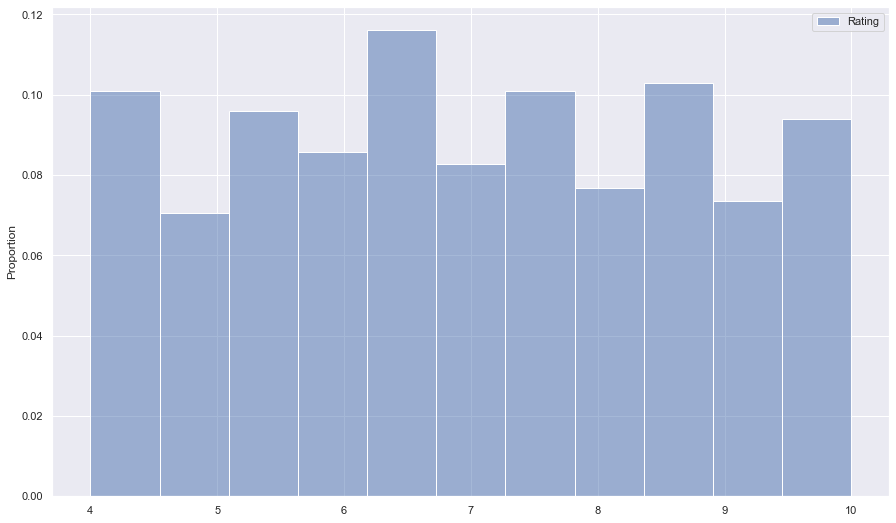

In [58]:
sns.set_theme(rc={'figure.figsize':(15,9)})
sns.histplot(data[['Rating']],stat='proportion')

In [59]:
data[['Rating']].describe()

,Rating
count,991.000000
mean,6.979717
std,1.716957
min,4.000000
25%,5.500000
50%,7.000000
75%,8.500000
max,10.000000


Setting up the data for predicting Ratings

In [60]:
data = pd.read_csv("supermarket-sales-data.csv")
obj_columns = data.iloc[:,1:].select_dtypes(include=['object']).columns
obj_columns = list(obj_columns) # columns of data with type object

encoded_data = enc.fit_transform(data[obj_columns])
encoded_df = pd.DataFrame(
    encoded_data,columns= enc.get_feature_names_out(obj_columns)
)

data = data.drop(obj_columns,axis=1)
data = pd.concat([data,encoded_df],axis=1)

In [61]:
data.head()

,InvoiceID,UnitPrice,Quantity,Tax,Total,Rating,Branch_A,Branch_B,Branch_C,CustomerType_Member,...,Gender_Male,ProductType_Electronic accessories,ProductType_Fashion accessories,ProductType_Food and beverages,ProductType_Health and beauty,ProductType_Home and lifestyle,ProductType_Sports and travel,PaymentType_Cash,PaymentType_Credit card,PaymentType_UPI
0,750-67-8428,74.69,7,26.1415,548.9715,9.1,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,226-31-3081,15.28,5,3.8200,80.2200,9.6,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,631-41-3108,46.33,7,16.2155,340.5255,7.4,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,123-19-1176,58.22,8,23.2880,489.0480,8.4,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,373-73-7910,86.31,7,30.2085,634.3785,5.3,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [62]:
pred_cols = []
for col in data.columns:
    if col not in ['Rating','InvoiceID','Tax']: # Tax dropped as it has perfect correlation with Total
        pred_cols.append(col)
Xr = data[pred_cols] # features to predict from
yr = data['Rating'] # label to predict

### Splitting data for training and testing

In [63]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr,yr,test_size=0.20,random_state=42) # splits 20% for test and 80% for training

In [64]:
pred_cols

['UnitPrice',
 'Quantity',
 'Total',
 'Branch_A',
 'Branch_B',
 'Branch_C',
 'CustomerType_Member',
 'CustomerType_Normal',
 'Gender_Female',
 'Gender_Male',
 'ProductType_Electronic accessories',
 'ProductType_Fashion accessories',
 'ProductType_Food and beverages',
 'ProductType_Health and beauty',
 'ProductType_Home and lifestyle',
 'ProductType_Sports and travel',
 'PaymentType_Cash',
 'PaymentType_Credit card',
 'PaymentType_UPI']

### **2.1. Using Linear Regression**

In [65]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [66]:
lm_scores = {} #dictionary to store performance of Linear regression on Test Data

#### 2.1.1 Fitting a linear model (degree 1) with all the given features without regularisation

In [67]:
lm.fit(Xr_train,yr_train)

LinearRegression()

##### intercept and coefficients

In [68]:
lm.intercept_,lm.coef_

(6.708294885789684,
 array([ 0.00599541,  0.06494565, -0.00126933,  0.1238042 , -0.14110233,
         0.01729813, -0.01349123,  0.01349123,  0.03259692, -0.03259692,
        -0.03961456,  0.06504518,  0.1419576 ,  0.10045334, -0.16310202,
        -0.10473955, -0.04365606,  0.03901413,  0.00464193]))

RMSE as a metric for score

In [69]:
from sklearn.metrics import mean_squared_error


 RMSE on the Training data

In [70]:
mean_squared_error(yr_train,lm.predict(Xr_train),squared=False) # RMSE

1.6969730670046184

 RMSE on the Test Data

In [71]:
mean_squared_error(yr_test,lm.predict(Xr_test),squared=False)

1.7635723095541256

In [72]:
lm_scores['Linear Regression degree 1'] = mean_squared_error(yr_test,lm.predict(Xr_test),squared=False)

#### 2.1.2 Fitting a linear model (degree 1 ) with Lasso


In [73]:
from sklearn.linear_model import Lasso
lm2 = Lasso(alpha=0.5)
lm2.fit(Xr_train,yr_train)

Lasso(alpha=0.5)

In [74]:
lm2.intercept_,lm2.coef_

(7.096771040158097,
 array([ 0.        ,  0.        , -0.00032388,  0.        , -0.        ,
         0.        , -0.        ,  0.        ,  0.        , -0.        ,
        -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        -0.        , -0.        ,  0.        ,  0.        ]))

In [75]:
mean_squared_error(yr_train,lm2.predict(Xr_train),squared=False)

1.706630708888798

In [76]:
mean_squared_error(yr_test,lm2.predict(Xr_test),squared=False)

1.7567636589489286

In [77]:
lm_scores['Lasso degree 1'] = mean_squared_error(yr_test,lm2.predict(Xr_test),squared=False)

#### 2.1.3 Fitting a linear model (degree 1 ) with Ridge

In [78]:
from sklearn.linear_model import Ridge
lm3 = Ridge(alpha=10)
lm3.fit(Xr_train,yr_train)

Ridge(alpha=10)

In [79]:
lm3.intercept_,lm3.coef_

(6.712558969886316,
 array([ 0.0059379 ,  0.06429894, -0.00126126,  0.11896852, -0.13632541,
         0.01735688, -0.01336016,  0.01336016,  0.03135017, -0.03135017,
        -0.03714859,  0.06059096,  0.13303942,  0.09222193, -0.15118803,
        -0.09751568, -0.04252038,  0.0380205 ,  0.00449989]))

In [80]:
mean_squared_error(yr_train,lm3.predict(Xr_train),squared=False)

1.6969960805318103

In [81]:
mean_squared_error(yr_test,lm3.predict(Xr_test),squared=False)

1.7626170795733191

In [82]:
lm_scores['Ridge degree 1'] = mean_squared_error(yr_test,lm3.predict(Xr_test),squared=False)

#### 2.1.4 Fitting a linear model (degree 1) with Elastic Net

In [83]:
from sklearn.linear_model import ElasticNet
lm4 = ElasticNet(max_iter=10**4,alpha=0.1,l1_ratio=0.5)
lm4.fit(Xr_train,yr_train)

ElasticNet(alpha=0.1, max_iter=10000)

In [84]:
lm4.intercept_,lm4.coef_

(6.94533699981066,
 array([ 0.00241222,  0.02591987, -0.00071451,  0.        , -0.        ,
         0.        , -0.        ,  0.        ,  0.        , -0.        ,
        -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        -0.        , -0.        ,  0.        ,  0.        ]))

In [85]:
mean_squared_error(yr_train,lm4.predict(Xr_train),squared=False)

1.7054370034664268

In [86]:
mean_squared_error(yr_test,lm4.predict(Xr_test),squared=False)

1.7549046363943255

In [87]:
lm_scores['ElasticNet degree 1'] = mean_squared_error(yr_test,lm4.predict(Xr_test),squared=False)

#### 2.1.5 Fitting a quadratic polynomial with lasso regularisation

In [88]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(Xr_train)
X_poly_test = poly.fit_transform(Xr_test)

poly.fit(X_poly_train)
lm5 = Lasso(alpha=1,max_iter=10**9)
lm5.fit(X_poly_train, yr_train)

Lasso(alpha=1, max_iter=1000000000)

In [89]:
lm5.intercept_,lm5.coef_

(6.840453836817362,
 array([ 0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  9.30088346e-04,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         6.70835194e-05,  0.00000000e+00, -3.18644694e-05,  0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -4.18700048e-05, -0.00000000e+00, -0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.000000

RMSE on training data

In [90]:
mean_squared_error(yr_train,lm5.predict(X_poly_train),squared=False)

1.6932259983432818

RMSE on test data

In [91]:
mean_squared_error(yr_test,lm5.predict(X_poly_test),squared=False)

1.7774510076417558

In [92]:
lm_scores['Lasso degree 2'] = mean_squared_error(yr_test,lm5.predict(X_poly_test),squared=False)

#### 2.1.6 Fitting a quadratic polynomial with Ridge

In [93]:
poly = PolynomialFeatures(degree=2,interaction_only=False)
X_poly_train = poly.fit_transform(Xr_train)
X_poly_test = poly.fit_transform(Xr_test)

# poly.fit(X_poly_train)
lm6 = Ridge(alpha=1,max_iter=10**9)
lm6.fit(X_poly_train, yr_train)

Ridge(alpha=1, max_iter=1000000000)

In [94]:
lm6.intercept_,lm6.coef_

(7.756078592540787,
 array([ 0.00000000e+00, -2.09726889e-02, -1.27221021e-01,  6.59252772e-03,
         5.76614896e-02, -1.08755203e-01,  5.10937132e-02, -1.18128757e-02,
         1.18128757e-02, -1.20353979e-03,  1.20353979e-03,  2.18465534e-01,
        -1.01052156e-01,  3.20721607e-01, -1.58936488e-01, -2.31108100e-01,
        -4.80903972e-02, -1.02047829e-02, -1.04600782e-01,  1.14805564e-01,
         6.75819789e-04,  6.27859864e-03, -2.70135495e-04, -9.43499063e-03,
        -3.36687675e-03, -8.17082152e-03, -1.00544991e-02, -1.09181897e-02,
        -8.13434608e-03, -1.28383428e-02, -1.70238054e-02,  9.38156698e-04,
        -1.59546951e-02,  8.59936601e-03,  1.24335653e-03,  1.22493244e-03,
        -7.35816606e-03, -1.36638896e-03, -1.22481338e-02,  2.95661342e-02,
        -1.91322546e-03, -4.84493140e-02, -1.25490620e-02, -6.62226451e-02,
        -7.17460122e-02, -5.54750089e-02, -8.43792821e-02, -4.28417389e-02,
        -1.14328128e-01,  3.41210653e-03, -1.70598192e-01,  3.071712

In [95]:
mean_squared_error(yr_train,lm6.predict(X_poly_train),squared=False)

1.6085723431912022

In [96]:
mean_squared_error(yr_test,lm6.predict(X_poly_test),squared=False)

1.8551648506721257

In [97]:
lm_scores['Ridge degree 2'] = mean_squared_error(yr_test,lm6.predict(X_poly_test),squared=False)

#### 2.1.7 Fitting a Quadratic Poynomial with Elastic Net

In [98]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(Xr_train)
X_poly_test = poly.fit_transform(Xr_test)

poly.fit(X_poly_train)
lm7 = ElasticNet(max_iter=10**9,alpha=5,l1_ratio=0.5)
lm7.fit(X_poly_train, yr_train)

ElasticNet(alpha=5, max_iter=1000000000)

In [99]:
lm7.intercept_,lm7.coef_

(6.91533972489117,
 array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         5.34723383e-05,  0.00000000e+00, -1.34645777e-05,  0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         1.26018022e-04,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.0000000

In [100]:
mean_squared_error(yr_train,lm7.predict(X_poly_train),squared=False)

1.6947486660306201

In [101]:
mean_squared_error(yr_test,lm7.predict(X_poly_test),squared=False)

1.7734814590344745

In [102]:
lm_scores['ElasticNet degree 2'] = mean_squared_error(yr_test,lm7.predict(X_poly_test),squared=False)

#### 2.1.8 Fitting a quadratic polynomial without regularisation

In [103]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(Xr_train)
X_poly_test = poly.fit_transform(Xr_test)

lm8 = LinearRegression()
lm8.fit(X_poly_train, yr_train)

LinearRegression()

In [104]:
lm8.intercept_,lm.coef_

(1736595.2346137236,
 array([ 0.00599541,  0.06494565, -0.00126933,  0.1238042 , -0.14110233,
         0.01729813, -0.01349123,  0.01349123,  0.03259692, -0.03259692,
        -0.03961456,  0.06504518,  0.1419576 ,  0.10045334, -0.16310202,
        -0.10473955, -0.04365606,  0.03901413,  0.00464193]))

In [105]:
mean_squared_error(yr_train,lm8.predict(X_poly_train),squared=False)

1.6085535619489837

In [106]:
mean_squared_error(yr_test,lm8.predict(X_poly_test),squared=False)

1.8588328865315185

In [107]:
lm_scores['Linear degree 2'] = mean_squared_error(yr_test,lm8.predict(X_poly_test),squared=False)

### 2.2 Using Decision Tree Regressor

In [108]:
from sklearn.tree import DecisionTreeRegressor

parameters_dtr = {}
parameters_dtr['max_depth'] = [3,4,5,6,7,9,11,13,15,None]
parameters_dtr['max_features'] = [None,'sqrt','log2']
parameters_dtr['splitter'] = ['random','best']
parameters_dtr['random_state'] = [0]
parameters_dtr['ccp_alpha'] = [0,0.005,0.010]

In [109]:
dtr = GridSearchCV(DecisionTreeRegressor(),param_grid=parameters_dtr,n_jobs=-1,cv=5,verbose =3,scoring='neg_root_mean_squared_error')
dtr.fit(Xr_train,yr_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'ccp_alpha': [0, 0.005, 0.01],
                         'max_depth': [3, 4, 5, 6, 7, 9, 11, 13, 15, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'random_state': [0], 'splitter': ['random', 'best']},
             scoring='neg_root_mean_squared_error', verbose=3)

In [110]:
dtr.best_params_ #best parameters found by hyperparametric tuning

{'ccp_alpha': 0.01,
 'max_depth': 3,
 'max_features': 'sqrt',
 'random_state': 0,
 'splitter': 'random'}

In [111]:
-dtr.best_score_ # best score on cross validation

1.733714679701146

In [112]:
dtr = dtr.best_estimator_

In [113]:
dtr.get_params()

{'ccp_alpha': 0.01,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'random'}

In [114]:
mean_squared_error(yr_train,dtr.predict(Xr_train),squared=False)

1.7055228430715883

Visualizing the Regression Tree

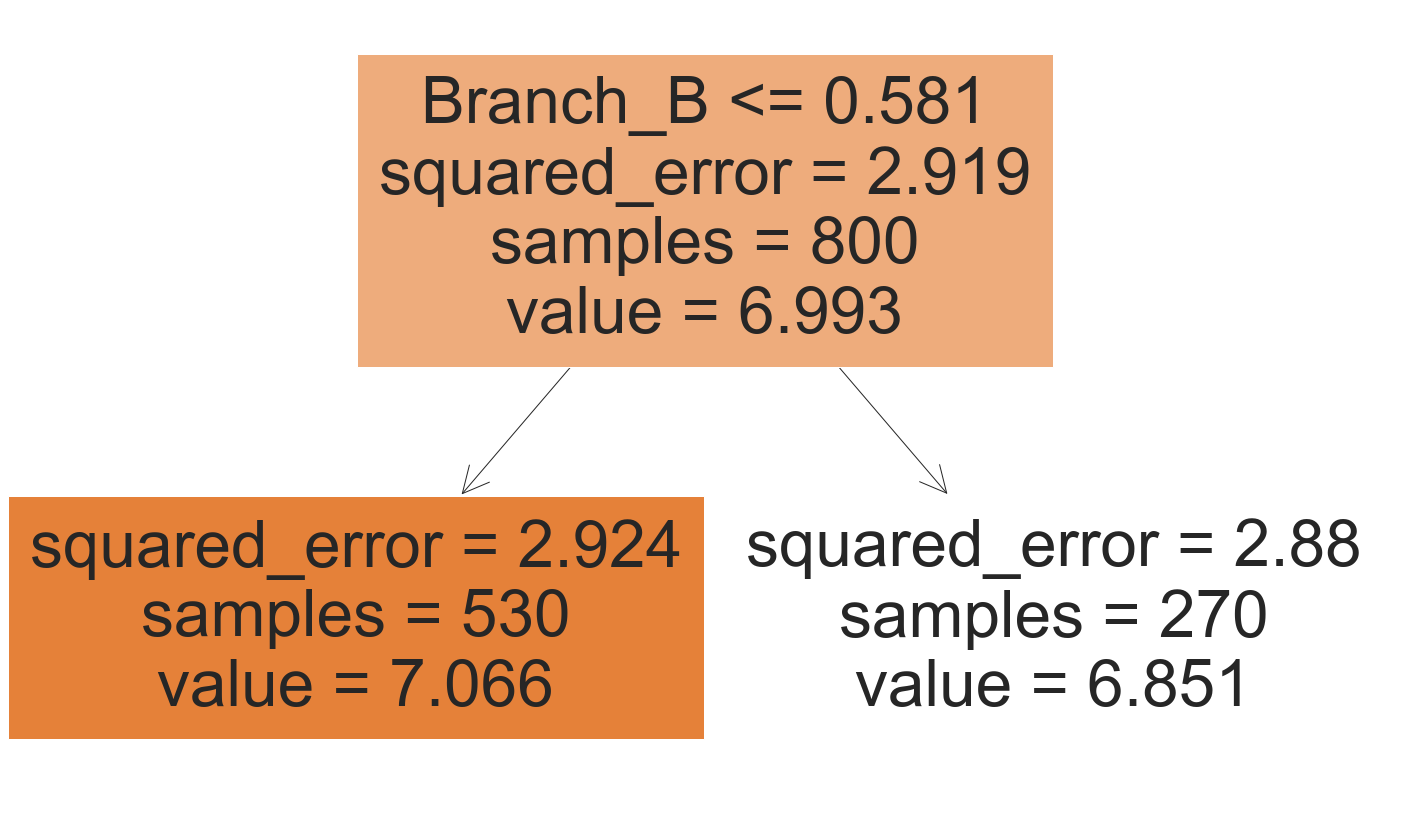

In [115]:
plt.figure(figsize=(25,15))
# _ = plot_tree(dtr.best_estimator_,feature_names=list(Xr.columns),filled=True)
_ = plot_tree(dtr,feature_names=list(Xr.columns),filled=True)

RMSE on test data

In [116]:
mean_squared_error(yr_test,dtr.predict(Xr_test),squared=False)

1.7495352767642034

Feature importance as per decision tree

In [117]:
imp = dict(zip(dtr.feature_names_in_,dtr.feature_importances_))
imp

{'UnitPrice': 0.0,
 'Quantity': 0.0,
 'Total': 0.0,
 'Branch_A': 0.0,
 'Branch_B': 1.0,
 'Branch_C': 0.0,
 'CustomerType_Member': 0.0,
 'CustomerType_Normal': 0.0,
 'Gender_Female': 0.0,
 'Gender_Male': 0.0,
 'ProductType_Electronic accessories': 0.0,
 'ProductType_Fashion accessories': 0.0,
 'ProductType_Food and beverages': 0.0,
 'ProductType_Health and beauty': 0.0,
 'ProductType_Home and lifestyle': 0.0,
 'ProductType_Sports and travel': 0.0,
 'PaymentType_Cash': 0.0,
 'PaymentType_Credit card': 0.0,
 'PaymentType_UPI': 0.0}

Training a linear model(degree 1 and 2) again with feature importance greater than 0.1

In [118]:
Xr_train_2 = Xr_train[[col for col in Xr_train.columns if imp[col] >= 0.1]]
Xr_test_2 = Xr_test[[col for col in Xr_test.columns if imp[col] >= 0.1]]

degree 1

In [119]:
lm = Ridge(alpha=0.5,max_iter=10**6)
lm.fit(Xr_train_2,yr_train)

Ridge(alpha=0.5, max_iter=1000000)

In [120]:
lm.intercept_,lm.coef_

(7.065647038327525, array([-0.21413937]))

In [121]:
mean_squared_error(yr_train,lm.predict(Xr_train_2),squared=False)

1.705522866557417

In [122]:
mean_squared_error(yr_test,lm.predict(Xr_test_2),squared=False)

1.7495414442331771

In [123]:
lm_scores['Ridge with feature selection degree 1'] = mean_squared_error(yr_test,lm.predict(Xr_test_2),squared=False)

degree 2

In [124]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(Xr_train_2)
X_poly_test = poly.fit_transform(Xr_test_2)

lm = Ridge(max_iter=10**6,alpha=0.5)
lm.fit(X_poly_train, yr_train)

Ridge(alpha=0.5, max_iter=1000000)

In [125]:
lm.intercept_,lm.coef_

(7.065747906489881, array([ 0.        , -0.10721912, -0.10721912]))

In [126]:
mean_squared_error(yr_train,lm.predict(X_poly_train),squared=False)

1.7055228489594463

In [127]:
mean_squared_error(yr_test,lm.predict(X_poly_test),squared=False)

1.7495383593103535

In [128]:
lm_scores['Ridge with feature selection degree 2'] = mean_squared_error(yr_test,lm.predict(X_poly_test),squared=False)

Performance of Linear regression in predicting ratings (RMSE)

In [129]:
lm_scores

{'Linear Regression degree 1': 1.7635723095541256,
 'Lasso degree 1': 1.7567636589489286,
 'Ridge degree 1': 1.7626170795733191,
 'ElasticNet degree 1': 1.7549046363943255,
 'Lasso degree 2': 1.7774510076417558,
 'Ridge degree 2': 1.8551648506721257,
 'ElasticNet degree 2': 1.7734814590344745,
 'Linear degree 2': 1.8588328865315185,
 'Ridge with feature selection degree 1': 1.7495414442331771,
 'Ridge with feature selection degree 2': 1.7495383593103535}

Performance of decision tree in predicting ratings (RMSE)

In [130]:
mean_squared_error(yr_test,dtr.predict(Xr_test),squared=False)

1.7495352767642034